In [1]:
import wandb
import matplotlib.pyplot as plt

In [2]:
from plots import compare_runs_by_category, plot_training_curves, fetch_multiple_runs

# Baseline vs Best model

✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: gine5_seed=0 (67kzs4j1)


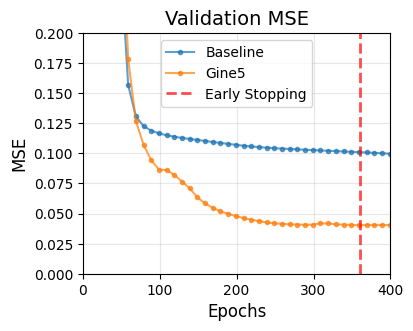

✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: gine5_seed=0 (67kzs4j1)


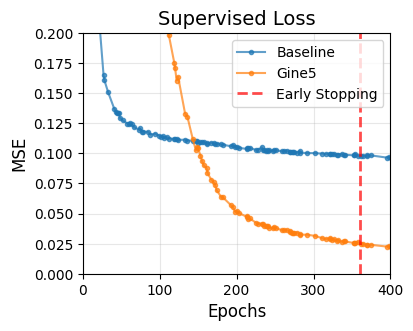

✓ Fetched data for run: baseline (4kg85c4u)
✓ Fetched data for run: gine5_seed=0 (67kzs4j1)


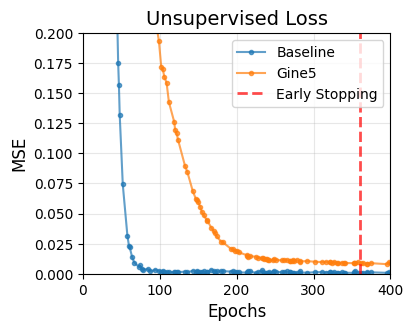

In [3]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE', 'supervised_loss', 'unsupervised_loss']
metric_titles = {'val_MSE': 'Validation MSE', 'supervised_loss': 'Supervised Loss', 'unsupervised_loss': 'Unsupervised Loss'}
runs_ids = ['4kg85c4u','67kzs4j1']
labels = ['Baseline', 'Gine5']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=360, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,400)
    plt.tight_layout()
    plt.title(metric_titles.get(metric, metric), fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()

# Batch size

✓ Fetched data for run: gcn5_seed=0 (yq0bj14f)
✓ Fetched data for run: best_gine5_seed=0 (04ftmt8x)
✓ Fetched data for run: gine5_batchsize64 (rlmvsj7m)
✓ Fetched data for run: gcn5_AdamW (ksn7m63w)


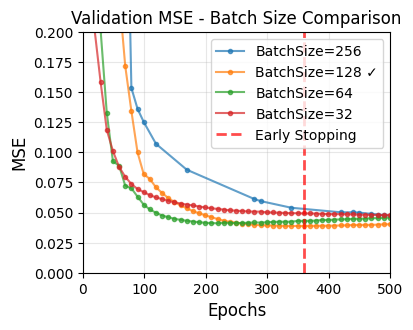

In [4]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE']
runs_ids = ['yq0bj14f','04ftmt8x', 'rlmvsj7m','ksn7m63w'] 
labels = ['BatchSize=256', 'BatchSize=128 ✓', 'BatchSize=64', 'BatchSize=32']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=360, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,500)
    plt.tight_layout()
    plt.title('Validation MSE - Batch Size Comparison')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()

# Optimizers

✓ Fetched data for run: gine5_seed=SGD (771iuvv2)
✓ Fetched data for run: gine5_Adam (yjuu1ngw)
✓ Fetched data for run: best_gine5_seed=0 (04ftmt8x)


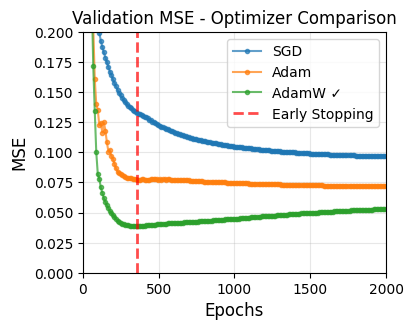

In [5]:
entity = "carlahugod-danmarks-tekniske-universitet-dtu"
project = "GNN_semi_supervised"
metrics = ['val_MSE']
runs_ids = ['771iuvv2','yjuu1ngw', '04ftmt8x']
labels = ['SGD', 'Adam', 'AdamW ✓']

for metric in metrics:
    runs_data = fetch_multiple_runs(entity, project, runs_ids, metric)

    plt.figure(figsize=(4, 3))
    for run_id, data in runs_data.items():
        history = data["history"]

        label = labels[runs_ids.index(run_id)] if labels else run_id

        # Plot the metric
        if metric in history.columns and "_step" in history.columns:
            # Filter out NaN values
            valid_data = history[[metric, "_step"]].dropna()
            plt.plot(valid_data["_step"], valid_data[metric], label=label, marker='o', markersize=3, alpha=0.7)
        else:
            print(f"Warning: {metric} not found in run {run_id}")

    plt.axvline(x=360, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Early Stopping')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(0,0.2)
    plt.xlim(0,2000)
    plt.tight_layout()
    plt.title('Validation MSE - Optimizer Comparison')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.show()